In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cat/Dog Classification from the paper-back book

## General steps of developing a classifier
1. Download Dataset
2. Create a Dataloader
3. Download Pre-trained Model
4. Finetune model with dataset
5. Run Inference

Following two cells will only be needed to run once, on start of __every session__

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [6]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.167984,0.026053,0.010149,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.101554,0.046398,0.013532,01:16


In [9]:
# os.listdir(path) --> will show all the files in that path. adding [:10] will show first 10
os.listdir(path)[:10] 

['beagle_115.jpg',
 'boxer_18.jpg',
 'Maine_Coon_157.jpg',
 'scottish_terrier_28.jpg',
 'english_setter_6.jpg',
 'american_pit_bull_terrier_79.jpg',
 'boxer_128.jpg',
 'Persian_265.jpg',
 'Maine_Coon_182.jpg',
 'keeshond_89.jpg']

In [27]:
path, type(path)

(Path('/root/.fastai/data/oxford-iiit-pet/images'), pathlib.PosixPath)

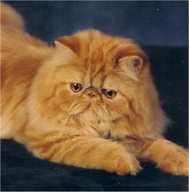

In [24]:
img = PILImage.create(str(path)+"/Persian_265.jpg")
img.to_thumb(192)

Doing inference by downloading image from internet and uploading to notebook via widgets

In [29]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

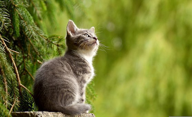

In [33]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [34]:
is_cat,_, prob = learn.predict(img)
print(f"Is this a cat?: {is_cat} ")
print(f"Probability it's a cat: {prob[1].item():.6f}")

Is this a cat?: True 
Probability it's a cat: 1.000000
